#### ***習題三 : Yale Faces分析***
資料為38個人總共2410張影像，
分別使用 Logist、SVM、MLP、CNN進行學習、預測。

In [2]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D,Reshape
from keras.optimizers import SGD, Adam
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegressionCV
from keras.layers import  Input,InputLayer
import scipy

In [3]:
#all face



D = scipy.io.loadmat("C:/vscode/淺度hw3練習/allFaces.mat")
m = int(D['m'])#168
n = int(D['n'])#192
X = pd.DataFrame(D["faces"])
y= np.ndarray.flatten(D["nfaces"])
# X = D["faces"]
target = []
#設置標籤
for i in range(y.shape[0]):
     for j in range(y[i]):
        target.append(i)
target= np.array(target,dtype="int32")
# print(X.shape)
# print(target.shape)
X_train,X_test,y_train,y_test = train_test_split(X.T,target,test_size=0.3,random_state=0)
# X_test=X_test.T.values
# X_train = X_train.T.values
X_test = X_test/255
X_train = X_train/255
# print(X_test.shape)
# print(y_test.shape)

C:\Users\USER\AppData\Local\Temp\ipykernel_32260\570761094.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  m = int(D['m'])#168
C:\Users\USER\AppData\Local\Temp\ipykernel_32260\570761094.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  n = int(D['n'])#192


#### ***討論***
因資料沒有設置標籤，上面代碼利用y(每個人的影像張數)使用兩個for迴圈製作標籤並且儲存在target裡面，接著分成訓練及和測試集，再分別除以255，此動作為了將像素值縮放到0到1的範圍內。這樣做有助於模型的訓練，因為神經網絡更喜歡處理輸入值在較小範圍內的數據。

1.使用Logistic後進行學習後，列印出準確率回報。

In [3]:
#Logist

opts = dict(tol = 0.001, max_iter = int(1e6), verbose=1) 
solver = 'lbfgs' # ’lbfgs’ is the default
# solver = ’liblinear’
# solver = ’newton−cg’
clf_original = LogisticRegression(solver = solver, **opts) 
clf_original.fit(X_train, y_train)
y_pred = clf_original.predict(X_test)
# 測試資料之準確率回報 

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        23
           1       0.93      1.00      0.96        13
           2       0.94      1.00      0.97        17
           3       1.00      0.95      0.97        20
           4       1.00      1.00      1.00        23
           5       1.00      1.00      1.00        11
           6       0.95      0.95      0.95        20
           7       1.00      0.92      0.96        24
           8       0.88      1.00      0.93        21
           9       1.00      1.00      1.00        20
          10       1.00      0.89      0.94        19
          11       1.00      0.95      0.97        20
          12       0.95      1.00      0.97        19
          13       1.00      1.00      1.00        15
          14       0.93      0.96      0.95        27
          15       1.00      0.91      0.95        22
          16       0.94      1.00      0.97        17
          17       1.00    

#### **討論**
此資料在使用Logistic模型學習後，預測率為96%，除了19準確率為73%，其個別類別準確率、recall、f1-score有皆有90%左右。

2.使用SVM後進行學習後，列印出準確率回報。

In [16]:
#SVM

C = 1 # SVM regularization parameter
opts = dict(C = C, tol = 0.001, max_iter = int(1e6))
# opts = dict(C = C, decision_function_shape = ’ovo’, \
# tol = 1e−6, max_iter = int(1e6))
clf_svm = SVC(kernel='linear', **opts)
# clf_svm = SVC(kernel=”rbf”, gamma=0.2, **opts)
# clf_svm = SVC(kernel=”poly”, degree=3, gamma=”auto”, **opts)
# clf_svm = LinearSVC(**opts) # one vs the rest
clf_svm.fit(X_train, y_train)
predictions = clf_svm.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        23
           1       0.59      1.00      0.74        13
           2       0.71      1.00      0.83        17
           3       1.00      0.95      0.97        20
           4       0.96      1.00      0.98        23
           5       0.83      0.91      0.87        11
           6       0.90      0.90      0.90        20
           7       0.88      0.88      0.88        24
           8       0.94      0.71      0.81        21
           9       0.81      0.85      0.83        20
          10       0.95      1.00      0.97        19
          11       1.00      0.95      0.97        20
          12       1.00      0.95      0.97        19
          13       1.00      1.00      1.00        15
          14       0.93      1.00      0.96        27
          15       1.00      0.86      0.93        22
          16       1.00      1.00      1.00        17
          17       1.00    

#### **討論**
此資料在使用Logistic模型學習後，預測率為94%，除了1、2、19準確率分別為59%、71%、73%，其餘個別類別準確率、recall、f1-score有皆有90%左右。

3.使用MLP後進行學習後，列印出準確率回報。

In [4]:
#MLP


hidden_layers = (256,)
# activation = 'logistic'
activation = 'relu'

opts = dict(hidden_layer_sizes = hidden_layers , verbose = 0,activation = activation, tol = 0.001, max_iter = int(1e6))
# solver = ’sgd’ # not efficient, need more tuning
# solver = ’lbfgs’ # not suitable here
solver = 'adam' # default solver
clf_MLP = MLPClassifier(solver = solver, **opts)
clf_MLP.fit(X_train, y_train)
predictions = clf_MLP.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.92      0.92      0.92        13
           2       0.89      1.00      0.94        17
           3       1.00      0.90      0.95        20
           4       1.00      1.00      1.00        23
           5       1.00      1.00      1.00        11
           6       0.95      1.00      0.98        20
           7       1.00      0.88      0.93        24
           8       0.91      1.00      0.95        21
           9       1.00      0.95      0.97        20
          10       1.00      0.89      0.94        19
          11       1.00      0.90      0.95        20
          12       1.00      1.00      1.00        19
          13       1.00      1.00      1.00        15
          14       0.90      1.00      0.95        27
          15       1.00      0.95      0.98        22
          16       1.00      1.00      1.00        17
          17       1.00    

#### **討論**
因考慮到資料較為龐大，其隱藏層設置為256，
此資料在使用MLP模型學習後，預測率為97%，其個別類別準確率、recall、f1-score有皆有90%左右。

4.使用CNN後進行學習後，列印出準確率回報。

In [4]:
#CNN

images =[]
targets = []

for i in range(X_train.shape[0]):
    image = X_train.iloc[i,:].values.reshape((m,n))
    target = y_train[i]
    images.append(image)
    targets.append(target)
images_train = np.array(images,dtype= "float32")
targets_train = np.array(targets,dtype="int32")

# print(targets_train.shape)


images =[]
targets = []
for i in range(X_test.shape[0]):
    image = X_test.iloc[i,:].values.reshape((m,n))
    target = y_test[i]
    images.append(image)
    targets.append(target)
images_test = np.array(images,dtype= "float32")
targets_test= np.array(targets,dtype="int32")
# print(images_test.shape)
# print(targets_test.shape)

In [5]:

input_shape= (m,n,1)

model = Sequential([
    Input(shape=input_shape),
    Conv2D(64,(3,3),input_shape=input_shape,padding="same",activation="relu",strides=2),
    MaxPooling2D((2,2),strides=2),
    Dropout(0.2),
    Conv2D(128,(3,3),input_shape=input_shape,padding="same",activation="relu",strides=2),
    MaxPooling2D((2,2),strides=2),
    Dropout(0.2),
    # Conv2D(128,(3,3),input_shape=input_shape,padding="same",activation="relu",strides=2),
    # MaxPooling2D((2,2),strides=2),
    # Dropout(0.2),
    Flatten(),
    # Dropout(0.5),
    Dense(40,activation="sigmoid")
])
model.compile(optimizer="adam",loss = "sparse_categorical_crossentropy",metrics=["accuracy"])
histoy = model.fit(images_train,targets_train,epochs=35)

Epoch 1/35


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.0338 - loss: 3.6755
Epoch 2/35
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.1601 - loss: 3.2532
Epoch 3/35
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7761 - loss: 1.0489
Epoch 4/35
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9746 - loss: 0.1765
Epoch 5/35
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9915 - loss: 0.0847
Epoch 6/35
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9928 - loss: 0.0473
Epoch 7/35
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9942 - loss: 0.0378
Epoch 8/35
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9934 - loss: 0.0355
Epoch 9/35
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9943 - loss: 0.0197
Epoch 10/35
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9963 - loss: 0.0293
Epoch 11/35
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9983 - loss: 0.0215
Epoch 12/35
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9987 - l

#### **討論**
分成訓練、測試集後，我們將訓練資料轉換成 168x192(m x n)的矩陣並命名為 images_train，同時也將其對應的類別標籤命名為 targets_train。對於測試資料，我們以相同的方式進行轉換，將其命名為 images_test 和 targets_test。這樣的資料整理是為了供卷積神經網絡 (CNN) 模型讀取使用。接著建立模型，epochs設定為35，下面列印出回報率表。

In [7]:
predictions =model.predict(images_test)
targets_pred = np.argmax(predictions,axis=1)

print(classification_report(targets_test, targets_pred))

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        23
           1       0.67      0.92      0.77        13
           2       0.85      1.00      0.92        17
           3       0.95      0.90      0.92        20
           4       1.00      1.00      1.00        23
           5       0.92      1.00      0.96        11
           6       1.00      0.90      0.95        20
           7       1.00      0.92      0.96        24
           8       0.95      0.95      0.95        21
           9       1.00      0.95      0.97        20
          10       1.00      1.00      1.00        19
          11       1.00      0.90      0.95        20
          12       0.90      0.95      0.92        19
          13       1.00      1.00      1.00        15
          14       0.96      1.00      0.98        27
          15       0.95      0.95      0.95        22
          16       0.94      1.00      0.9

#### **討論**
在迭代35次下，其準確率只有96%，其個別類別準確率、recall、f1-score有皆有90%。

Epoch 1/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.0235 - loss: 3.6923 - val_accuracy: 0.0277 - val_loss: 3.5618
Epoch 2/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.1234 - loss: 3.3172 - val_accuracy: 0.5920 - val_loss: 1.7642
Epoch 3/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.7347 - loss: 1.1739 - val_accuracy: 0.8838 - val_loss: 0.4955
Epoch 4/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9516 - loss: 0.2403 - val_accuracy: 0.9557 - val_loss: 0.2050
Epoch 5/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9923 - loss: 0.0725 - val_accuracy: 0.9640 - val_loss: 0.1685
Epoch 6/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9957 - loss: 0.0317 - val_accuracy: 0.9640 - val_loss: 0.1613
Epoch 7/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9978 - loss: 0.0218 - val_accuracy: 0.9751 - val_loss: 0.1378
Epoch 8/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9927 - loss: 0.0329 - val_accuracy: 0.

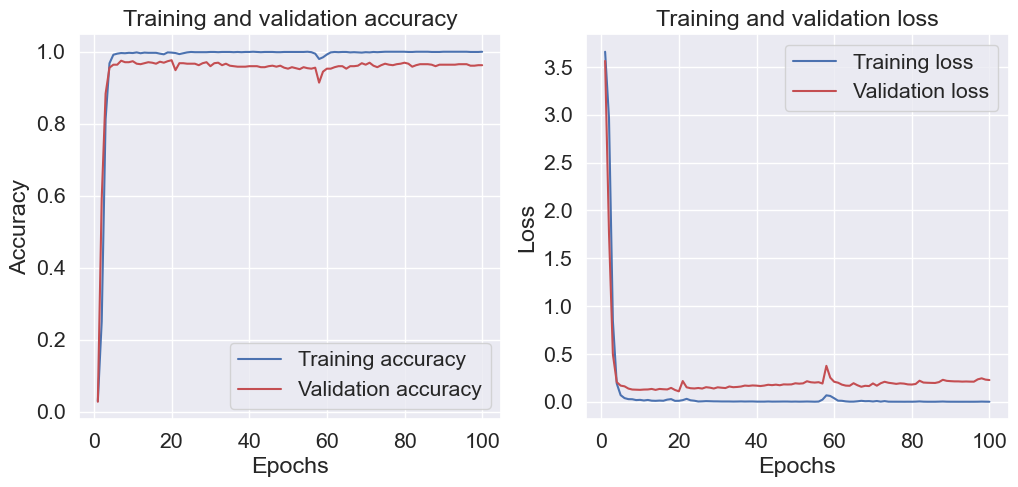

In [5]:
history = model.fit(images_train, targets_train, epochs=100, validation_data=(images_test,targets_test))


train_accuracy = history.history['accuracy']
train_loss = history.history['loss']
val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']


epochs = range(1, len(train_accuracy) + 1)

plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

#### **討論**
由上圖知此資料在epochs為10後，測試集合訓練集的accuracy和loss是趨於穩定的，故選epochs=35是可以的。

#### **使用PCA分析**
前三個主成份總共佔了變異量(1687個)的70%，但只用前三個來學習，其準確率幾乎為0，所以在此選擇使用前30個主成份來分析，前30個佔總變異量的90％左右。

In [9]:
pca = PCA().fit(X_train)
explained_variance_ratio = pca.explained_variance_ratio_
val =explained_variance_ratio.cumsum()/explained_variance_ratio.sum()*100
print(val[20:30])

[89.71258147 89.97678468 90.21853513 90.45734874 90.68155677 90.89700363
 91.10348015 91.29925131 91.48582498 91.66375938]


5.使用Logistic後進行學習後，列印出準確率回報。

In [6]:
#PCA_Logist

pca = PCA(n_components = 30).fit(X_train)

Z_train = pca.transform(X_train)
Z_test = pca.transform(X_test)
opts = dict(tol = 0.0001, max_iter = int(1e6), verbose=1)
solver ='lbfgs' # ’lbfgs’ is the default
# solver = ’liblinear’
# solver = ’newton−cg’
clf_PCA = LogisticRegression(solver = solver, **opts)
clf_PCA.fit(Z_train, y_train)
y_pred = clf_PCA.predict(Z_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.78      0.88        23
           1       0.93      1.00      0.96        13
           2       0.76      0.94      0.84        17
           3       0.89      0.80      0.84        20
           4       0.88      1.00      0.94        23
           5       0.71      0.91      0.80        11
           6       0.88      0.70      0.78        20
           7       0.74      0.71      0.72        24
           8       0.86      0.86      0.86        21
           9       0.89      0.85      0.87        20
          10       0.84      0.84      0.84        19
          11       0.89      0.85      0.87        20
          12       0.82      0.74      0.78        19
          13       0.93      0.93      0.93        15
          14       0.86      0.89      0.87        27
          15       0.81      0.77      0.79        22
          16       0.84      0.94      0.89        17
          17       0.94    

#### **討論**
此資料在使用Logistic模型學習後，預測率為85%，19、33準確率在60%左右，5、7、37準確率在70%左右，其餘個別類別準確率、recall、f1-score有皆有80%以上。

6.使用MLP後進行學習後，列印出準確率回報。

In [11]:
#MLP_PCA

# hidden_layers = (512,) # one hidden layer
activation = 'relu'# the default
hidden_layers = (256,)
# activation = 'logistic'
opts = dict(hidden_layer_sizes = hidden_layers , verbose = 0,activation = activation, tol = 0.001, max_iter = int(1e6))
# solver = ’sgd’ # not efficient, need more tuning
# solver = ’lbfgs’ # not suitable here
solver = 'adam' # default solver
clf_MLP = MLPClassifier(solver = solver, **opts)
clf_MLP.fit(Z_train, y_train)
predictions = clf_MLP.predict(Z_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        23
           1       0.93      1.00      0.96        13
           2       0.89      0.94      0.91        17
           3       1.00      0.80      0.89        20
           4       1.00      1.00      1.00        23
           5       0.71      0.91      0.80        11
           6       0.90      0.90      0.90        20
           7       0.80      0.83      0.82        24
           8       0.95      0.90      0.93        21
           9       0.90      0.90      0.90        20
          10       0.89      0.84      0.86        19
          11       1.00      0.85      0.92        20
          12       0.95      0.95      0.95        19
          13       0.93      0.93      0.93        15
          14       0.81      0.96      0.88        27
          15       0.90      0.86      0.88        22
          16       0.89      1.00      0.94        17
          17       1.00    

#### **討論**
此資料在使用MLP模型學習、隱藏層設置為256下，其預測率為91%，個別類別準確率、recall、f1-score有皆在90%左右。

7.使用PCA後進行學習後，列印出準確率回報。

In [12]:
#SVM_PCA

C = 1 # SVM regularization parameter
opts = dict(C = C, tol = 0.001, max_iter = int(1e6))
# opts = dict(C = C, decision_function_shape = ’ovo’, \
# tol = 1e−6, max_iter = int(1e6))
clf_svm = SVC(kernel='linear', **opts)
# clf_svm = SVC(kernel=”rbf”, gamma=0.2, **opts)
# clf_svm = SVC(kernel=”poly”, degree=3, gamma=”auto”, **opts)
# clf_svm = LinearSVC(**opts) # one vs the rest
clf_svm.fit(Z_train, y_train)
predictions = clf_svm.predict(Z_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80        23
           1       0.62      1.00      0.76        13
           2       0.84      0.94      0.89        17
           3       0.93      0.70      0.80        20
           4       0.92      1.00      0.96        23
           5       0.62      0.91      0.74        11
           6       0.75      0.90      0.82        20
           7       0.88      0.88      0.88        24
           8       0.94      0.71      0.81        21
           9       0.77      0.85      0.81        20
          10       0.85      0.89      0.87        19
          11       1.00      0.90      0.95        20
          12       1.00      0.95      0.97        19
          13       1.00      1.00      1.00        15
          14       0.89      0.93      0.91        27
          15       0.86      0.86      0.86        22
          16       0.89      1.00      0.94        17
          17       0.95    

#### **討論**
此資料在使用MLP模型學習、隱藏層設置為512下，其預測率為89%，除了類別標籤5其準確率為62%，其餘個別類別準確率、recall、f1-score有皆在80%左右。

8.使用CNN後進行學習後，列印出準確率回報。

In [7]:
#CNN_pca
from keras.layers import  Input
input_shape= (30,)

model = Sequential([
    Input(shape=input_shape),
    Reshape(target_shape=(6,5,1)),
    Conv2D(128,(3,3),input_shape=input_shape,padding="same",activation="relu",strides=2),
    MaxPooling2D((2,2),strides=2),
    # Conv2D(64,(3,3),input_shape=input_shape,padding="same",activation="relu",strides=2),
    Dropout(0.2),
    Flatten(),
    Dense(40, activation='sigmoid')
    ])

model.compile(optimizer="adam",loss = "sparse_categorical_crossentropy",metrics=["accuracy"])
history= model.fit(Z_train,y_train,epochs=150,verbose=0)

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
predictions =model.predict(Z_test)
targets_pred = np.argmax(predictions,axis=1)

print(classification_report(targets_test, targets_pred))

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
              precision    recall  f1-score   support

           0       0.89      0.74      0.81        23
           1       0.63      0.92      0.75        13
           2       0.68      0.88      0.77        17
           3       0.78      0.70      0.74        20
           4       0.91      0.87      0.89        23
           5       0.62      0.73      0.67        11
           6       0.61      0.70      0.65        20
           7       0.67      0.67      0.67        24
           8       0.79      0.71      0.75        21
           9       0.81      0.65      0.72        20
          10       0.55      0.84      0.67        19
          11       0.81      0.85      0.83        20
          12       1.00      0.84      0.91        19
          13       0.62      0.53      0.57        15
          14       0.85      0.81      0.83        27
          15       0.79      0.50      0.61        22
          16       0.88      0.82      0.

#### **討論**
在迭代150次下，其準確率只有74%，其中標籤31、33準確率只有40％左右，5、6、28、35準確率只有60%左右

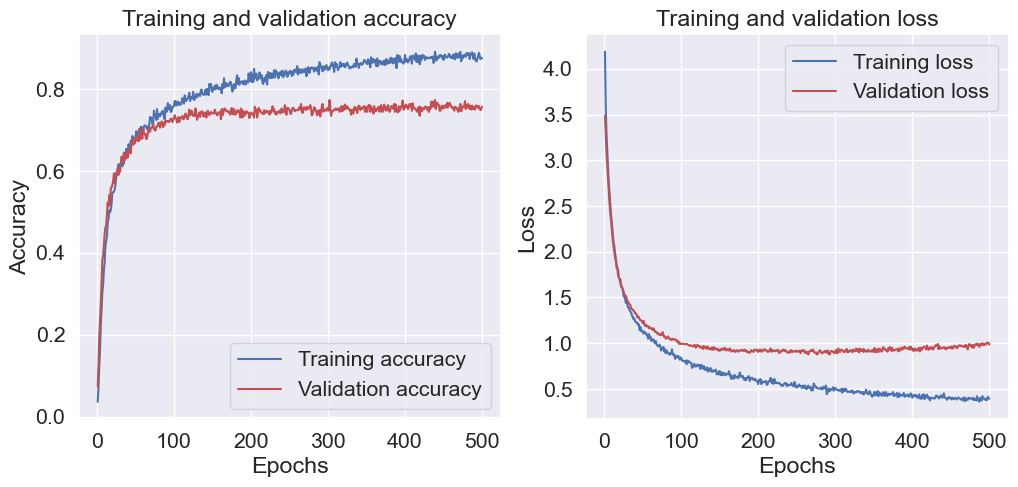

In [8]:

history = model.fit(Z_train, y_train, epochs=500, validation_data=(Z_test,y_test),verbose=0)


train_accuracy = history.history['accuracy']
train_loss = history.history['loss']
val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']


epochs = range(1, len(train_accuracy) + 1)

plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

#### **討論**
由上圖知此資料在epochs為150後，測試集和訓練集的accuracy和loss的差距越來越大，可能是過擬和了，且測試集準確度也沒有繼續上升趨勢，故選epochs=150內是可以的。

#### **結論**
|  | Logistic | SVM |MLP|  CNN|
|----------|:---------:|---------:|---------:|---------:
|    accuracy |   0.96 |    0.94|0.97|0.96|
|  accuracy(前13個主成分)   |   0.85 |    0.91|0.89|  0.74

此資料使用在Logistic、MLP、CNN表現差不多，SVM稍微差一點點，主成分分析後的資料，SVM表現最好，準確率高達0.91，CNN其準確率只有0.74，結論為此資料在Logistic、MLP、CNN下的表現下較佳，且主成分資料不建議使用CNN來分類。

#### **總結**
上面分析結果，並不能當最終結論，由於訓練過程中的涉及各種參數以及數據的複雜性，我們得出的結論只能視為在我們調整的參數範圍內、以及我們選擇的模型中的最佳結果。在實踐中，我們可能會嘗試多種不同的參數組合和模型架構，以找到最適合解決特定問題的解決方案。然而可以確定的是CNN在使用主成分分析的資料學習，其表現最差。